# Task

To build a model which would predict the order status (Delivered to buyer or Returned to seller)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("orders_data.xlsx")
df.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [3]:
df.dtypes

order_no        object
order_date      object
buyer           object
ship_city       object
ship_state      object
sku             object
description     object
quantity         int64
item_total      object
shipping_fee    object
cod             object
order_status    object
dtype: object

In [4]:
df.shape

(171, 12)

In [5]:
df.item_total.unique()

array(['₹449.00', nan, '₹1,099.00', '₹200.00', '₹399.00', '₹649.00',
       '₹250.00', '₹549.00', '₹175.00', '₹1,299.00', '₹349.00', '₹898.00',
       '₹1,347.00', '₹499.00', '₹475.00', '₹3,897.00', '₹1,499.00',
       '₹899.00', '₹1,796.00'], dtype=object)

In [6]:
df.shipping_fee.unique()

array([nan, '₹60.18', '₹84.96', '₹114.46', '₹62.54', '₹81.42', '₹47.20',
       '₹178.18', '₹210.04', '₹80.24', '₹146.32', '₹133.34', '₹241.90',
       '₹105.02'], dtype=object)

In [7]:
# check for null values
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

null values present in item_total, shipping_fee and cod

In [8]:
df.cod.unique()

array([nan, 'Cash On Delivery'], dtype=object)

In [9]:
df1 = df.copy()
df1.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [10]:
# remove currency sign from data and commas
cols = ["item_total", "shipping_fee"]
df1["item_total"] = df1["item_total"].str.strip('₹')
df1["item_total"] = df1["item_total"].str.replace(',', '')
df1["shipping_fee"] = df1["shipping_fee"].str.strip('₹')
df1.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.00,84.96,NaN,Delivered to buyer


In [11]:
# convert dtype to float
df1 = df1.astype({"item_total": "float64", "shipping_fee": "float64"})
df1.dtypes

order_no         object
order_date       object
buyer            object
ship_city        object
ship_state       object
sku              object
description      object
quantity          int64
item_total      float64
shipping_fee    float64
cod              object
order_status     object
dtype: object

In [12]:
df1.item_total.unique()

array([ 449.,   nan, 1099.,  200.,  399.,  649.,  250.,  549.,  175.,
       1299.,  349.,  898., 1347.,  499.,  475., 3897., 1499.,  899.,
       1796.])

In [13]:
df1.shipping_fee.unique()

array([   nan,  60.18,  84.96, 114.46,  62.54,  81.42,  47.2 , 178.18,
       210.04,  80.24, 146.32, 133.34, 241.9 , 105.02])

In [14]:
# now deal with the missing values
df1.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

In [15]:
df1.describe()

,quantity,item_total,shipping_fee
count,171.000000,153.000000,145.000000
mean,1.087719,582.856209,84.748414
std,0.445132,488.100122,26.562623
min,1.000000,175.000000,47.200000
25%,1.000000,399.000000,84.960000
50%,1.000000,449.000000,84.960000
75%,1.000000,549.000000,84.960000
max,4.000000,3897.000000,241.900000


In [16]:
cols = ["item_total", "shipping_fee"]
df1[cols].mean()

item_total      582.856209
shipping_fee     84.748414
dtype: float64

In [17]:
# fill na with means 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy= "mean")
imp.fit(df1[cols])
df1[cols] = imp.transform(df1[cols])


In [18]:
df1.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total        0
shipping_fee      0
cod             124
order_status      0
dtype: int64

In [19]:
df1.cod.unique()

array([nan, 'Cash On Delivery'], dtype=object)

In [20]:
# fill cod col
# replace Cash On Delivery with Yes
# and Nan with No
df1.cod.fillna('No', inplace= True)
df1["cod"] = df1["cod"].replace('Cash On Delivery', 'Yes')
df1.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.000000,84.748414,No,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.180000,No,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.180000,No,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,582.856209,84.748414,Yes,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.000000,84.960000,No,Delivered to buyer


In [21]:
df1.isna().sum()

order_no        0
order_date      0
buyer           0
ship_city       0
ship_state      0
sku             0
description     0
quantity        0
item_total      0
shipping_fee    0
cod             0
order_status    0
dtype: int64

all na values dealt with

In [22]:
df1["ship_city"] = df1["ship_city"].str.replace(',', '')
df1["ship_city"] = df1["ship_city"].str.lower()
df1["ship_state"] = df1["ship_state"].str.lower()

In [23]:
df1.ship_state.unique()

array(['chandigarh', 'arunachal pradesh', 'telangana', 'maharashtra',
       'west bengal', 'uttar pradesh', 'karnataka', 'chhattisgarh',
       'haryana', 'tripura', 'tamil nadu', 'odisha', 'andhra pradesh',
       'delhi', 'goa', 'jammu & kashmir', 'gujarat', 'assam', 'kerala',
       'punjab', 'rajasthan', 'chandigarh,', 'bihar', 'madhya pradesh',
       'mohali,', 'himachal pradesh', 'uttarakhand'], dtype=object)

In [24]:
df1.ship_city.unique()

array(['chandigarh', 'pasighat', 'devarakonda', 'mumbai', 'howrah',
       'orai', 'bareilly', 'bengaluru', 'bhilai', 'faridabad', 'agartala',
       'coonoor', 'pune', 'mantha', 'kolkata', 'mahalingpur', 'hyderabad',
       'mumbai 400 026', 'cuttack', 'gurugram', 'jaleswar',
       'visakhapatnam', 'punepune', 'new delhi', 'raia', 'bhubaneswar',
       'jagdalpur', 'salem', 'jammu', 'ahmedabad', 'silchar', 'guwahati',
       'ernakulam', 'karaikkudi', 'kodad', 'badlapur', 'surat', 'thane',
       'pollachi', 'raipur', 'jalandhar', 'thisayanvilai', 'bidhan nagar',
       'tuticorin', 'jaipur', 'chennai', 'palai', 'korba', 'saharanpur',
       'thamarassery', 'gautam buddha nagar', 'katwa', 'jodhpur', 'malda',
       'noida', 'secunderabad', 'siwan', 'navi mumbai', 'bardez',
       'thane district', 'indore', 'ghaziabad', 'vadodara', 'punjab',
       'amroha', 'lucknow', 'burdwan', 'kodambakkam chennai', 'allahabad',
       'bilimora', 'kanpur', 'solan', 'dehradun', 'durg'], dtype=obje

In [25]:
df1.shape

(171, 12)

In [26]:
# consider ship_state, order_no, order_date, buyer and dwscription as unimportant columns hence drop them
df2 = df1.drop(["ship_state","order_no", "order_date", "buyer", "description"], axis= 1)
df2.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,chandigarh,SKU: 2X-3C0F-KNJE,1,449.000000,84.748414,No,Delivered to buyer
1,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
2,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
3,devarakonda,SKU: AH-J3AO-R7DN,1,582.856209,84.748414,Yes,Delivered to buyer
4,mumbai,SKU: KL-7WAA-Z82I,1,1099.000000,84.960000,No,Delivered to buyer


In [27]:
df2.order_status.unique()

array(['Delivered to buyer', 'Returned to seller'], dtype=object)

visualizations

In [28]:
import matplotlib.pyplot as plt
import numpy as np

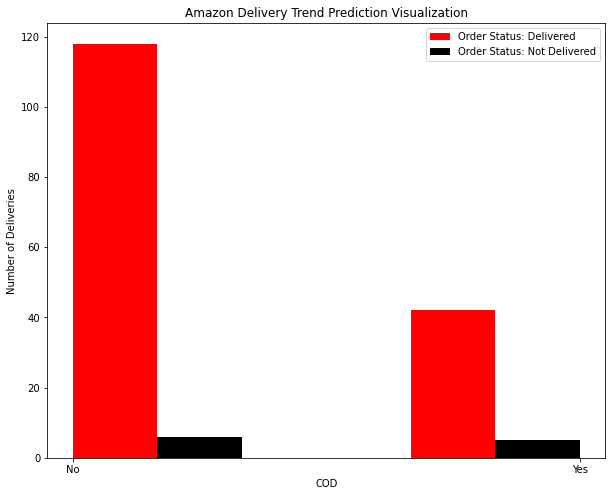

In [29]:
# see orders that paid on delivery and if delivered
delivered = df2[df2.order_status == "Delivered to buyer"].cod
not_delivered = df2[df2.order_status == "Returned to seller"].cod

plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel("COD")
plt.ylabel("Number of Deliveries")
plt.title("Amazon Delivery Trend Prediction Visualization")
plt.hist([delivered, not_delivered], color= ["red", "black"], label= ["Order Status: Delivered", "Order Status: Not Delivered"], bins= 3, rwidth= 2.0)
plt.legend()

there is a higher chance your order will be delivered if you pay before delivery as compared to paying on delivery

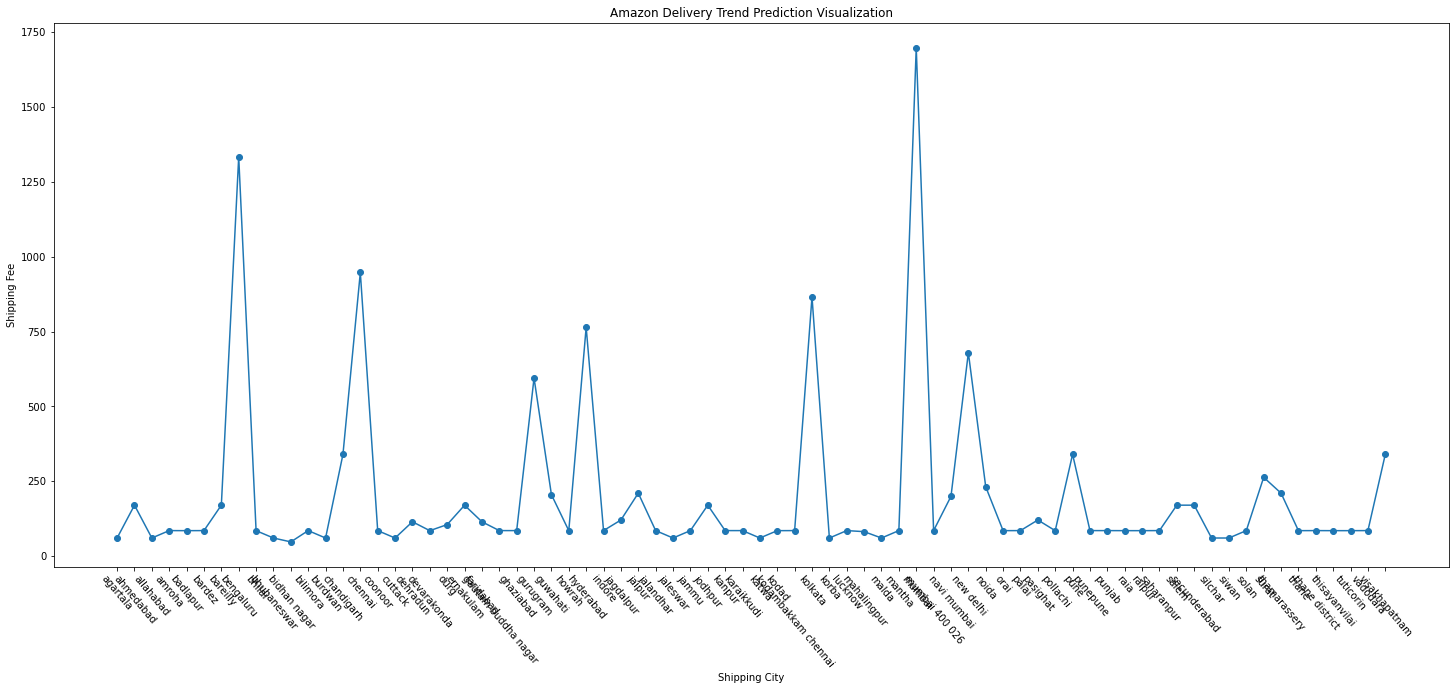

In [34]:
# Compare shipping cost and shipping city
ship_city_cost = df2.groupby("ship_city")['shipping_fee'].sum().to_frame().reset_index()
# ship_city_cost.head()
plt.xlabel("Shipping City")
plt.ylabel("Shipping Fee")
plt.title("Amazon Delivery Trend Prediction Visualization")
plt.plot(ship_city_cost.ship_city, ship_city_cost.shipping_fee)
plt.scatter(ship_city_cost.ship_city, ship_city_cost.shipping_fee)
plt.rcParams["figure.figsize"] = (25,10)
plt.xticks(rotation= -50)
plt.show()

In [35]:
df2.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,chandigarh,SKU: 2X-3C0F-KNJE,1,449.000000,84.748414,No,Delivered to buyer
1,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
2,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
3,devarakonda,SKU: AH-J3AO-R7DN,1,582.856209,84.748414,Yes,Delivered to buyer
4,mumbai,SKU: KL-7WAA-Z82I,1,1099.000000,84.960000,No,Delivered to buyer


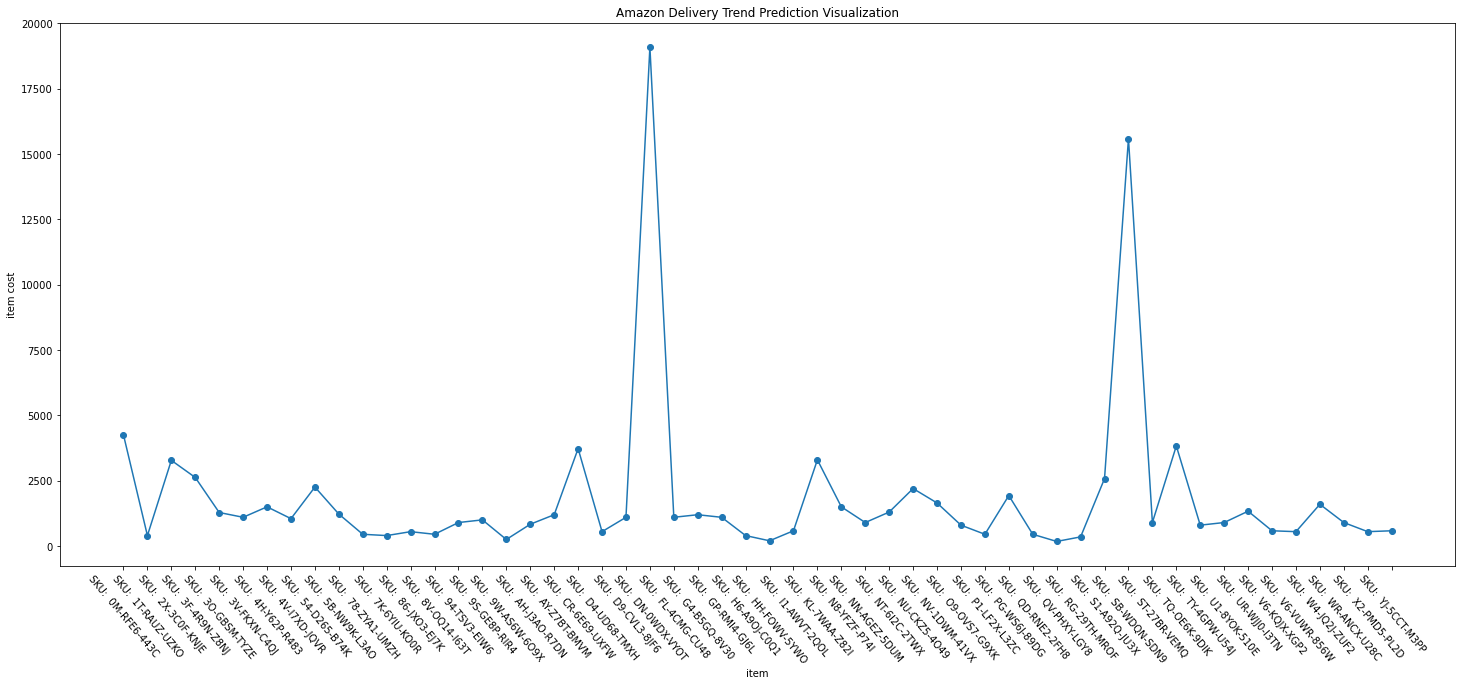

In [36]:
# comparing item and their cost
item_cost = df2.groupby("sku")['item_total'].sum().to_frame().reset_index()
# item_cost.head()
plt.xlabel("item")
plt.ylabel("item cost")
plt.title("Amazon Delivery Trend Prediction Visualization")
plt.plot(item_cost.sku, item_cost.item_total)
plt.scatter(item_cost.sku, item_cost.item_total)
plt.rcParams["figure.figsize"] = (25,10)
plt.xticks(rotation= -50)
plt.show()

In [37]:
df2.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,chandigarh,SKU: 2X-3C0F-KNJE,1,449.000000,84.748414,No,Delivered to buyer
1,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
2,pasighat,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
3,devarakonda,SKU: AH-J3AO-R7DN,1,582.856209,84.748414,Yes,Delivered to buyer
4,mumbai,SKU: KL-7WAA-Z82I,1,1099.000000,84.960000,No,Delivered to buyer


Model Bulding

In [38]:
df3 = df2.copy()
df3.dtypes

ship_city        object
sku              object
quantity          int64
item_total      float64
shipping_fee    float64
cod              object
order_status     object
dtype: object

convert object columns to int or float

this will be done by label encoding

In [39]:
# first print unique values of columns with dtypes = object
def print_unique(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column}: {df[column].unique()}')


print_unique(df3)


ship_city: ['chandigarh' 'pasighat' 'devarakonda' 'mumbai' 'howrah' 'orai' 'bareilly'
 'bengaluru' 'bhilai' 'faridabad' 'agartala' 'coonoor' 'pune' 'mantha'
 'kolkata' 'mahalingpur' 'hyderabad' 'mumbai 400 026' 'cuttack' 'gurugram'
 'jaleswar' 'visakhapatnam' 'punepune' 'new delhi' 'raia' 'bhubaneswar'
 'jagdalpur' 'salem' 'jammu' 'ahmedabad' 'silchar' 'guwahati' 'ernakulam'
 'karaikkudi' 'kodad' 'badlapur' 'surat' 'thane' 'pollachi' 'raipur'
 'jalandhar' 'thisayanvilai' 'bidhan nagar' 'tuticorin' 'jaipur' 'chennai'
 'palai' 'korba' 'saharanpur' 'thamarassery' 'gautam buddha nagar' 'katwa'
 'jodhpur' 'malda' 'noida' 'secunderabad' 'siwan' 'navi mumbai' 'bardez'
 'thane district' 'indore' 'ghaziabad' 'vadodara' 'punjab' 'amroha'
 'lucknow' 'burdwan' 'kodambakkam chennai' 'allahabad' 'bilimora' 'kanpur'
 'solan' 'dehradun' 'durg']
sku: ['SKU:  2X-3C0F-KNJE' 'SKU:  DN-0WDX-VYOT' 'SKU:  AH-J3AO-R7DN'
 'SKU:  KL-7WAA-Z82I' 'SKU:  HH-FOWV-5YWO' 'SKU:  TQ-OE6K-9DIK'
 'SKU:  S1-A92Q-JU3X' 'SKU

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3["ship_city"] = le.fit_transform(df3["ship_city"])
df3.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,13,SKU: 2X-3C0F-KNJE,1,449.000000,84.748414,No,Delivered to buyer
1,53,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
2,53,SKU: DN-0WDX-VYOT,1,449.000000,60.180000,No,Delivered to buyer
3,18,SKU: AH-J3AO-R7DN,1,582.856209,84.748414,Yes,Delivered to buyer
4,46,SKU: KL-7WAA-Z82I,1,1099.000000,84.960000,No,Delivered to buyer


In [41]:
df4 = df3.copy()
df4.head(2)

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,13,SKU: 2X-3C0F-KNJE,1,449.0,84.748414,No,Delivered to buyer
1,53,SKU: DN-0WDX-VYOT,1,449.0,60.180000,No,Delivered to buyer


In [42]:
le = LabelEncoder()
df3["sku"] = le.fit_transform(df3["sku"])
df3.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod,order_status
0,13,2,1,449.000000,84.748414,No,Delivered to buyer
1,53,22,1,449.000000,60.180000,No,Delivered to buyer
2,53,22,1,449.000000,60.180000,No,Delivered to buyer
3,18,17,1,582.856209,84.748414,Yes,Delivered to buyer
4,46,29,1,1099.000000,84.960000,No,Delivered to buyer


In [43]:
# 1 = Yes, 0 = No
df3["cod"] = df3["cod"].replace({'Yes': 1, 'No': 0})
print(df3.cod.unique())
df4["cod"] = df4["cod"].replace({'Yes': 1, 'No': 0})
print(df4.cod.unique())

[0 1]
[0 1]


In [44]:
# Delivered to buyer = 1, Returned to seller = 0
df3["order_status"] = df3["order_status"].replace({'Delivered to buyer': 1, 'Returned to seller': 0})
print(df3.order_status.unique())
df4["order_status"] = df4["order_status"].replace({'Delivered to buyer': 1, 'Returned to seller': 0})
print(df4.order_status.unique())

[1 0]
[1 0]


In [45]:
df3.dtypes

ship_city         int32
sku               int32
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [46]:
df4.dtypes

ship_city         int32
sku              object
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [47]:
# define X and y

X = df4.drop("order_status", axis= 1)
y = df4.order_status

In [48]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)


In [49]:
X_train.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod
69,10,SKU: DN-0WDX-VYOT,1,449.000000,47.20,0
162,48,SKU: WR-ANCX-U28C,1,449.000000,84.96,0
21,16,SKU: DN-0WDX-VYOT,1,449.000000,60.18,0
66,46,SKU: 1T-RAUZ-UZKO,1,399.000000,84.96,1
87,60,SKU: UR-WJJ0-I3TN,1,582.856209,84.96,0


In [50]:
X_test.dtypes

ship_city         int32
sku              object
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
dtype: object

In [51]:
X_test["sku"] = le.fit_transform(X_test["sku"])
X_test.head()


,ship_city,sku,quantity,item_total,shipping_fee,cod
61,55,0,1,399.0,84.960000,0
72,49,15,1,349.0,84.748414,0
167,17,17,1,1299.0,114.460000,0
138,7,12,1,449.0,84.960000,0
20,47,6,1,399.0,84.960000,0


In [52]:
X_train["sku"] = le.fit_transform(X_train["sku"])
X_train.head()

,ship_city,sku,quantity,item_total,shipping_fee,cod
69,10,22,1,449.000000,47.20,0
162,48,46,1,449.000000,84.96,0
21,16,22,1,449.000000,60.18,0
66,46,1,1,399.000000,84.96,1
87,60,43,1,582.856209,84.96,0


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

In [54]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weighth': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:

find_best_model_using_gridsearchcv(X_train, y_train)

[21:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_child_weighth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_child_weighth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mis

,model,best_score,best_params
0,linear_regression,-0.027971,{'normalize': True}
1,lasso,-0.013526,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.067664,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,XGBoost,0.942857,"{'gamma': 0.5, 'max_depth': 3, 'min_child_weig..."
4,LogisticRegression,0.942857,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'libl..."
5,RandomForestClassifier,0.942857,"{'max_features': 'auto', 'n_estimators': 10}"


three classifiers have the same accuracy ie. XGBoost, LogisticRegression, RandomForestClassifier with 94.2857%

hence choose to use any

use LogisticRegression

In [57]:
log = LogisticRegression(C= 0.0001, penalty= "l1", solver= 'liblinear')
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
log.score(X_test, y_test)

0.8571428571428571

use cross_val_score to evaluate model

In [59]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits= 10)
score = cross_val_score(log, X_train, y_train, cv= kfold)
score.mean()

0.9571428571428571

In [60]:
df3.dtypes

ship_city         int32
sku               int32
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [61]:
df4.dtypes

ship_city         int32
sku              object
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [62]:
X_test['sku'] = le.inverse_transform(X_test['sku'])

Submission

In [63]:
submission = pd.DataFrame(
    {'sku': X_test['sku'],
    'order_status': y_pred}, columns= ['sku', 'order_status']

)
submission.head()

,sku,order_status
61,SKU: 0M-RFE6-443C,1
72,SKU: 9S-GE8P-RIR4,1
167,SKU: AH-J3AO-R7DN,1
138,SKU: 86-JXO3-EJ7K,1
20,SKU: 4H-Y62P-R483,1


In [64]:
submission.order_status = submission["order_status"].replace({1: 'Delivered to buyer', 0: 'Returned to seller'})
submission.sample(10)

,sku,order_status
117,SKU: AH-J3AO-R7DN,Delivered to buyer
72,SKU: 9S-GE8P-RIR4,Delivered to buyer
128,SKU: AY-Z7BT-BMVM,Delivered to buyer
56,SKU: 2X-3C0F-KNJE,Delivered to buyer
137,SKU: 4V-I7XD-JQVR,Delivered to buyer
138,SKU: 86-JXO3-EJ7K,Delivered to buyer
116,SKU: AH-J3AO-R7DN,Delivered to buyer
111,SKU: AH-J3AO-R7DN,Delivered to buyer
19,SKU: 9W-AS6W-6O9X,Delivered to buyer
47,SKU: 7K-6YIU-KO0R,Delivered to buyer


In [65]:
submission.shape

(35, 2)

In [66]:
submission.to_csv("submission.csv", index= False)

confusion matrix and classification report

In [67]:
from sklearn.metrics import confusion_matrix, classification_report


In [68]:
# classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.86      1.00      0.92        30

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35



In [69]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  5],
       [ 0, 30]], dtype=int64)

Text(78.0, 0.5, 'Truth')

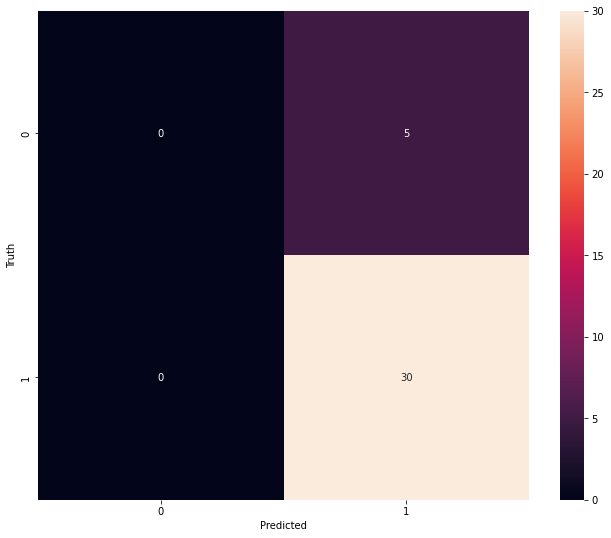

In [70]:
import seaborn as sn
plt.figure(figsize = (11,9))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

now try random predictions with user input

*assumptions:*

In [71]:
df2.cod.unique()

array(['No', 'Yes'], dtype=object)

# first create a key for label encoded columns
1. ship_city
2. sku
3. cod {1: 'Yes', 0: 'No'}

In [74]:
# ship_city key
ship_city = pd.DataFrame(
    {'city': df2["ship_city"],
    'encoded': df3["ship_city"]}, columns= ['city', 'encoded']

)

ship_city.to_csv("ship city key.csv", index= False)
ship_city.head()

,city,encoded
0,chandigarh,13
1,pasighat,53
2,pasighat,53
3,devarakonda,18
4,mumbai,46


In [76]:
df3.sku.unique()

array([ 2, 22, 17, 29, 27, 44, 41,  3, 33, 14, 23, 53, 37, 35, 18,  4,  0,
       45, 15, 19,  8, 20, 28, 51, 50,  9, 12, 42, 39, 26,  1, 47, 40, 25,
       46, 21, 24, 34, 16, 38,  5, 36, 11, 32, 52, 48,  6,  7, 13, 43, 31,
       49, 10, 30])

In [77]:
# sku key
# assuming data contains amazon's whole catalogue
sku = pd.DataFrame(
    {'sku': df2["sku"],
    'encoded': le.fit_transform(df3["sku"])}, columns= ["sku", "encoded"]
)
sku.to_csv("sku key.csv", index= False)
sku.head()

,sku,encoded
0,SKU: 2X-3C0F-KNJE,2
1,SKU: DN-0WDX-VYOT,22
2,SKU: DN-0WDX-VYOT,22
3,SKU: AH-J3AO-R7DN,17
4,SKU: KL-7WAA-Z82I,29


keys are now available

In [78]:
X.columns

Index(['ship_city', 'sku', 'quantity', 'item_total', 'shipping_fee', 'cod'], dtype='object')

In [79]:
df3.dtypes

ship_city         int32
sku               int32
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [80]:
df4.dtypes

ship_city         int32
sku              object
quantity          int64
item_total      float64
shipping_fee    float64
cod               int64
order_status      int64
dtype: object

In [81]:
a = df3.drop("order_status", axis= 1)
b = df3.order_status

In [82]:
a.sku.unique()

array([ 2, 22, 17, 29, 27, 44, 41,  3, 33, 14, 23, 53, 37, 35, 18,  4,  0,
       45, 15, 19,  8, 20, 28, 51, 50,  9, 12, 42, 39, 26,  1, 47, 40, 25,
       46, 21, 24, 34, 16, 38,  5, 36, 11, 32, 52, 48,  6,  7, 13, 43, 31,
       49, 10, 30])

In [83]:
len(a.columns)

6

In [85]:


def delivery(city, sku, quantity, total, fee, cod):
    x = np.zeros(len(a.columns))

    x[0] = city
    x[1] = sku
    x[2] = quantity
    x[3] = total
    x[4] = fee
    x[5] = cod
    
    d = log.predict([x])[0]

    if d == 1:
        print('Delivered to buyer')
    else:
        print('Returned to seller')
        
    

sku and city bounded by the key

In [86]:
delivery(12, 2, 3, 1, 0, 0)

Delivered to buyer


In [87]:
delivery(12, 2, 3, 0, 25558, 1)

Returned to seller


export model to pickle file

In [88]:
import pickle
with open('amazon.pickle', 'wb') as f:
    pickle.dump(log, f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in a.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))